In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
from math import e, pi, sin, cos
%matplotlib inline

In [2]:
def plot_response( w, h, title = 'Frequency response', fs = None, do_angle = False
                 , logx = False, logy = True, xmin = 0.0, xmax = None, ymin = None, ymax = None) :
    fig = plt.figure ()
    ax1 = fig.add_subplot (111)
    if logx :
        ax1.set_xscale ('log')
    plt.title (title)
    xlabel = 'Freq [rad/sample]'
    if fs is not None :
        w = np.array (w) * fs / (2 * pi)
        xlabel = 'Freq (Hz)'
        if fs == 1.0 :
            xlabel = '$\\Omega$'
    if logy :
        ax1.plot (w, 20 * np.log10 (abs (h)), 'b')
        plt.ylabel ('Amplitude (dB)', color = 'b')
    else :
        ax1.plot (w, abs (h), 'b')
        plt.ylabel ('Amplitude (lin.)', color = 'b')
    plt.xlabel (xlabel)
    plt.grid (which = 'both')

    if do_angle :
        ax2 = ax1.twinx ()
        angles = np.unwrap (np.angle (h))
        ax2.plot (w, angles, 'g')
        plt.ylabel ('Angle (rad)', color = 'g')
    plt.axis ('tight')
    ax1.set_xlim (xmin, xmax, auto = True)
    if ymin is not None or ymax is not None :
        ax1.set_ylim (ymin, ymax, auto = True)
    plt.show ()

In [3]:
def plot_delay (w, d, title = "Group delay", fs = None
               , logx = False, xmin = 0.0, xmax = None, ymin = None, ymax = None) :
    fig = plt.figure ()
    ax1 = fig.add_subplot (111)
    if logx :
        ax1.set_xscale ('log')
    plt.title (title)
    xlabel = 'Freq [rad/sample]'
    if fs is not None :
        w = np.array (w) * fs / (2 * pi)
        xlabel = 'Freq (Hz)'
        if fs == 1.0 :
            xlabel = '$\\Omega$'
    plt.plot (w, d, 'b')
    plt.ylabel ('Delay', color = 'b')
    plt.xlabel (xlabel)

    plt.grid ()
    plt.axis ('tight')
    ax1.set_xlim (xmin, xmax, auto = True)
    if ymin is not None or ymax is not None :
        ax1.set_ylim (ymin, ymax, auto = True)
    plt.show ()

In [4]:
def pole_zero_plot (poles, zeros, limit = 1e6, title='') :
    poles = np.array (poles)
    zeros = np.array (zeros)
    m1 = m2 = 1
    if len (poles) :
        m1 = max (abs (poles))
    if len (zeros) :
        m2 = max (abs (zeros))
    m  = max (m1, m2) + 1
    if m > limit :
        m = limit
    t = 'Pole / Zero Plot'
    if title :
        t = t + ' ' + title
    plt.plot(np.real(zeros), np.imag(zeros), 'ob')
    plt.plot(np.real(poles), np.imag(poles), 'xr')
    plt.legend(['Zeros', 'Poles'], loc=2)
    plt.title(t)
    plt.ylabel('Real')
    plt.xlabel('Imag')
    plt.grid()
    plt.xlim (-m, m)
    plt.ylim (-m, m)
    plt.gca ().set_aspect ('equal', adjustable='box')
    plt.show()


In [5]:
def update_conjugate_complex (numbers) :
    """ Modify numbers in-place to add conjugate complex numbers"""
    n2 = [k.conjugate () for k in numbers if k.imag]
    numbers.extend (n2)

[1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01
 1.00000000e+02]
[-4.+3.j -4.-3.j] [0.]
[5. 5.] [0.]


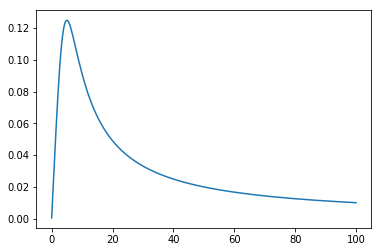

In [6]:
print (signal.findfreqs([1, 0], [1, 8, 25], N=9))
tf = signal.TransferFunction ([1, 0], [1, 8, 25])
print (tf.poles, tf.zeros)
print (abs (tf.poles), abs (tf.zeros))
w, h = signal.freqs_zpk (tf.zeros, tf.poles, 1.0)
plt.plot (w, abs (h))

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02]


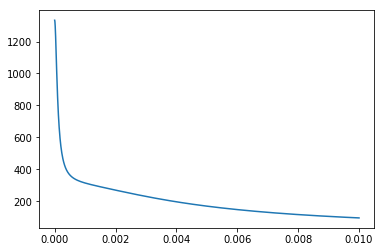

In [7]:
z = [318e-6]
p = [3180e-6, 75e-6]
print (signal.findfreqs (z, p, 5, kind = 'zp'))
w, h = signal.freqs_zpk (z, p, 1.0)
plt.plot (w, abs (h))

In [8]:
tf = signal.TransferFunction([1/3,1/3,1/3], [1])
print (tf.zeros)

[-0.5+0.8660254j -0.5-0.8660254j]


In [9]:
signal.tf2zpk([1/3,1/3,1/3], [1])

(array([-0.5+0.8660254j, -0.5-0.8660254j]),
 array([], dtype=float64),
 0.3333333333333333)

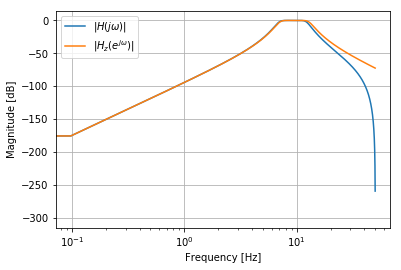

In [10]:
fs = 100
bf = 2 * np.pi * np.array([7, 13])
butter = signal.butter(4, bf, btype='bandpass', analog=True, output='zpk')
#print (butter)
filts = signal.lti (*butter)
#print ("filts1:", filts)
filtz = signal.lti(*signal.bilinear_zpk(filts.zeros, filts.poles, filts.gain, fs))
wz, hz = signal.freqz_zpk(filtz.zeros, filtz.poles, filtz.gain)
ws, hs = signal.freqs_zpk(filts.zeros, filts.poles, filts.gain, worN=fs*wz)
#filts = signal.lti(*signal.butter(4, bf, btype='bandpass', analog=True))
#print ("filts2:", filts)
#filtz = signal.lti(*signal.bilinear(filts.num, filts.den, fs))
#wz, hz = signal.freqz(filtz.num, filtz.den)
#ws, hs = signal.freqs(filts.num, filts.den, worN=fs*wz)
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)), label=r'$|H(j \omega)|$')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hs).clip(1e-15)), label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()


https://www.advsolned.com/converting-analog-filters-into-their-digital-equivalents-getting-the-best-of-both-worlds/#example


$$\frac{\omega_c ^ 2}{(s^2 + \frac{\omega_c}{Q} s + \omega_c^2}$$

[35530.57584392] [1.00000000e+00 2.66613238e+02 3.55305758e+04]
[0.02728621 0.05457243 0.02728621] [ 1.         -1.48135623  0.59050109]
3.1354567304382504
1567.7283652191252
[] [-133.30661896+133.26635428j -133.30661896-133.26635428j] [-0.26661324+0.26653271j -0.26661324-0.26653271j]
[0.9999925-7.50144635e-06j 0.9999925+7.50144635e-06j]
[-1. -1.] [0.74067811+0.20468761j 0.74067811-0.20468761j]


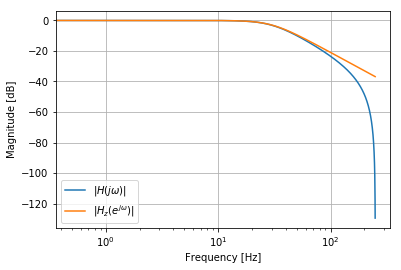

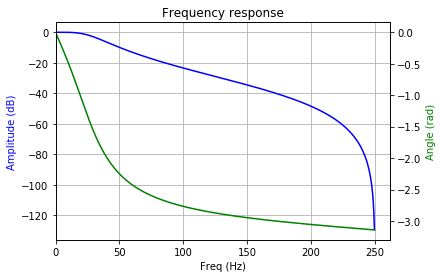

In [11]:
fs = 500
fc = 30
omega_c = 2 * pi * fc
q = 0.707
b = np.array ([omega_c ** 2])
a = np.array ([1, omega_c / q, omega_c ** 2])
filts = signal.lti (b, a)
print (b, a)
filtz = signal.lti(*signal.bilinear(filts.num, filts.den, fs))
print (filtz.num, filtz.den)
wz, hz = signal.freqz(filtz.num, filtz.den)
ws, hs = signal.freqs(filts.num, filts.den, worN=fs*wz)
print (wz [-1])
print (ws [-1])
print (filts.zeros, filts.poles, filts.poles / fs)
print (np.exp (1.0 / (filts.poles * fs)))
print (filtz.zeros, filtz.poles)
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)), label=r'$|H(j \omega)|$')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hs).clip(1e-15)), label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plot_response (wz, hz, do_angle = True, fs=fs)

# [Matched Z-Transform example](https://en.wikipedia.org/wiki/Matched_Z-transform_method) from wikipedia

Order-5 Chebychev poles according to the
[picture in the wikipedia article](https://en.wikipedia.org/wiki/File:Chebyshev_s_plane.svg)
Mentions the parameters in [google book](https://books.google.at/books?id=NuRvHVMuzI4C&pg=PA109)
Book mentions an appendix on how to compute zeros
But zeros *are* given in following table.
The table contains reals but since in the first table
imag and real are in separate columns the zeros are probably imag.
Seems these are given in rad and have to be scaled by frequency (20Hz)


analog gain: 3.7876490369221325


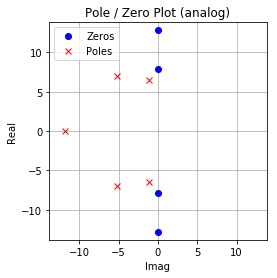

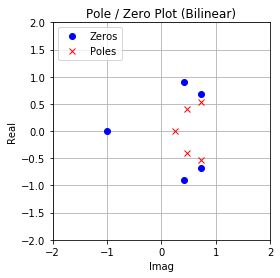

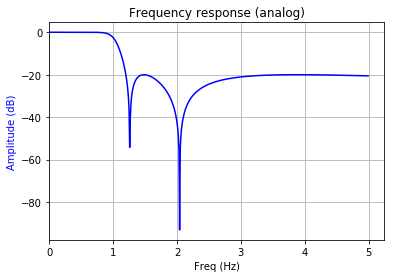

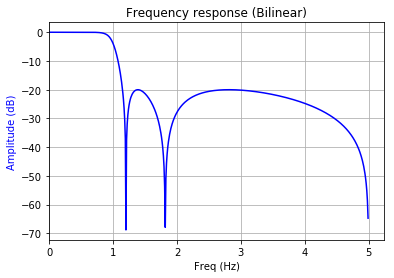

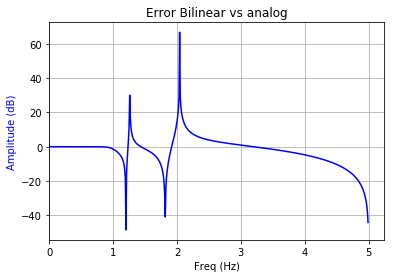

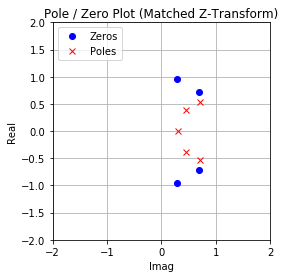

digital gain (matched Z-Transform): 0.1352684673351455


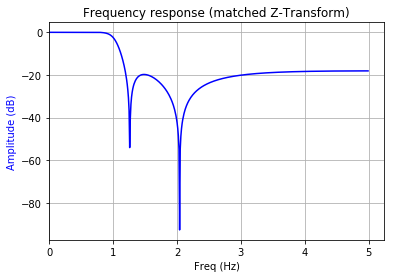

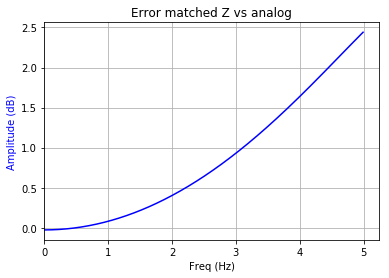

In [12]:
# Order-5 for 3dB Bandwidth and 20dB Stopband attenuation
# This is the one also plotted on wikipedia.
# 3dB Frequency: 0.84462
fs = 10

cpoles = [0.17766+1.01995j, 0.81236+1.10097j, 1.86437]
czeros = [1.24489j, 2.01428j]
update_conjugate_complex (cpoles)
update_conjugate_complex (czeros)
cpoles = np.array (cpoles)
czeros = np.array (czeros)

cpoles = cpoles / np.pi * -2 * fs
czeros = czeros / np.pi *  2 * fs

# Normalize to 1.0 @0.5Hz
k = 1.0
ws, hs = signal.freqs_zpk (czeros, cpoles, k, [0.5])
#print (k, abs (hz [0]), k / abs (hz [0]))
k = k / abs (hs [0])
print ("analog gain:", k)
filts = signal.lti (czeros, cpoles, k)
pole_zero_plot (filts.poles, filts.zeros, title='(analog)')
#print (filts.zeros, filts.poles, filts.gain)
filtz = signal.lti (*signal.bilinear_zpk(filts.zeros, filts.poles, filts.gain, fs))
wz, hz = signal.freqz_zpk (filtz.zeros, filtz.poles, filtz.gain)
#print (filtz.zeros, filtz.poles, filtz.gain)
pole_zero_plot (filtz.poles, filtz.zeros, title='(Bilinear)')
ws, hs = signal.freqs_zpk (filts.zeros, filts.poles, filts.gain, worN=fs*wz)
#ws, hs = signal.freqs_zpk (filts.zeros, filts.poles, filts.gain)
plot_response (wz, hs, fs=10, title='Frequency response (analog)')
plot_response (wz, hz, fs=10, title='Frequency response (Bilinear)')
plot_response (wz, abs (hz) / abs (hs), fs=10, title='Error Bilinear vs analog')

zzeros = np.exp (czeros / fs)
zpoles = np.exp (cpoles / fs)
pole_zero_plot (zpoles, zzeros, title = '(Matched Z-Transform)')
k = 1.0
# Normalize to 1.0 @0.5 (pi / 5)
wz, hz = signal.freqz_zpk (zzeros, zpoles, k, [0.5 * np.pi / 5])
k = k / abs (hz [0])
print ("digital gain (matched Z-Transform):", k)
filtz1 = signal.lti (zzeros, zpoles, k)
wz, hz = signal.freqz_zpk (filtz1.zeros, filtz1.poles, filtz1.gain)
plot_response (wz, hz, fs=10, title='Frequency response (matched Z-Transform)')
#plot_response (wz, 20 * np.log10 (abs (hz)) - 20 * np.log10 (abs (hs)), fs=10, title='Error matched Z vs analog', logy=0)
plot_response (wz, abs (hz) / abs (hs), fs=10, title='Error matched Z vs analog')

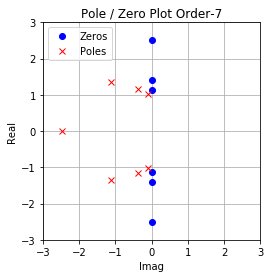

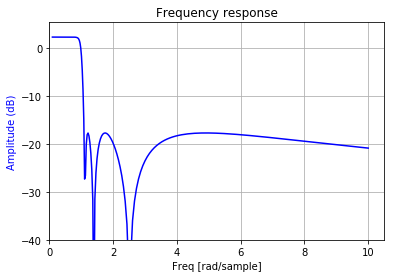

In [13]:
# Order-5 for 3dB Bandwidth and 30dB Stopband attenuation
# 3dB Frequency: 0.73314
cpoles = [0.22153+100244j, 0.84874+0.90666j, 1.47021]
czeros = [1.43419j, 2.32056j]
# Order-5 for 3dB Bandwidth and 40dB Stopband attenuation
# Hmpf: The page with the zero-Table isn't shown in google preview
cpoles = [0.25195+0.98715j, 0.84806+0.78437j, 1.27301]
czeros = []

# Order-7
# 3dB Frequency: 0.91533
cpoles = [0.09360+1.01680j, 0.37271+1.15880j, 1.13417+1.35424j, 2.47872]
czeros = [1.12060j, 1.39737j, 2.51797j]
update_conjugate_complex (cpoles)
update_conjugate_complex (czeros)
cpoles = np.array (cpoles) * -1
czeros = np.array (czeros)
pole_zero_plot (cpoles, czeros, title='Order-7', limit=3)
filts  = signal.lti (czeros, cpoles, 1.0)
ws, hs = signal.freqs_zpk(filts.zeros, filts.poles, filts.gain)
plot_response (ws, hs, ymin = -40)